<a href="https://colab.research.google.com/github/sohv/ai_from_scratch/blob/main/mle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation

MLE is the process of estimating the parameters of a distribution that maximize the likelihood of the observed data, belonging to that distribution

In [ ]:
# import libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import logistic
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
# create synthetic dataset for binary classification
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [ ]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To **calculate the likelihood function**, we calculate the negative log-likelihood function for logistic regression and minimize this function which is equivalent to maximizing the likelihood

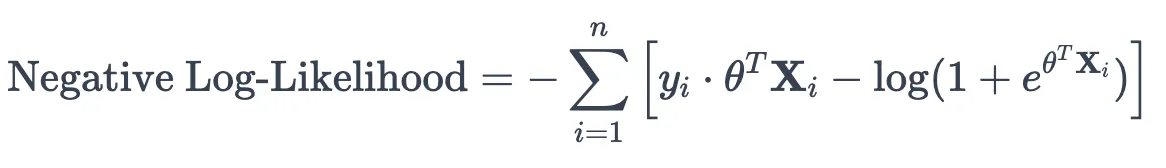

In [ ]:
def neg_log_likelihood(theta, X, y):
  z = np.dot(X, theta)
  n_log_likelihood = -np.sum(y * z - np.log(1+np.exp(-z)))
  return n_log_likelihood

In [ ]:
# We now find the parameters (θ) that minimize the negative likelihood function

# initialize theta with 0 with its length being number of features plus 1 (intercept term)
initial_theta = np.zeros(X_train.shape[1] + 1)
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# minimize the likelihood function
result = minimize(neg_log_likelihood, initial_theta, args=(X_train_with_intercept, y_train), method='BFGS')
estimated_theta = result.x

<ipython-input-15-c12887c4202b>:3: RuntimeWarning: overflow encountered in exp
  n_log_likelihood = -np.sum(y * z - np.log(1+np.exp(-z)))
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
<ipython-input-15-c12887c4202b>:3: RuntimeWarning: overflow encountered in exp
  n_log_likelihood = -np.sum(y * z - np.log(1+np.exp(-z)))


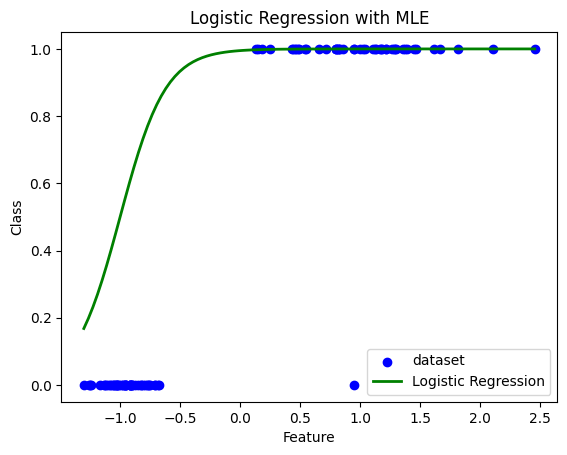

In [ ]:
# Plot the logistic regression curve
x_values = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
x_values_with_intercept = np.c_[np.ones(x_values.shape[0]), x_values]
predicted_probabilities = logistic.cdf(np.dot(x_values_with_intercept, estimated_theta))

plt.scatter(X, y, color='blue', marker='o', label='dataset')
plt.plot(x_values, predicted_probabilities, color='green', linewidth=2, label='Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('Logistic Regression with MLE')
plt.legend()

In [ ]:
# Evaluate the model on the test set
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
predicted_probabilities_test = logistic.cdf(np.dot(X_test_with_intercept, estimated_theta))
predicted_labels_test = (predicted_probabilities_test >= 0.5).astype(int)

accuracy = np.mean(predicted_labels_test == y_test)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.6
